In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1)
])


In [ ]:
base_model = MobileNetV2(
    input_shape=(32, 32, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False


/tmp/ipython-input-1440027392.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
model = models.Sequential([
    data_augmentation,
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_data=(x_test, y_test)
)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 46ms/step - accuracy: 0.2325 - loss: 2.0887 - val_accuracy: 0.2892 - val_loss: 1.9385
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 45ms/step - accuracy: 0.2845 - loss: 1.9533 - val_accuracy: 0.3093 - val_loss: 1.9045
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.2939 - loss: 1.9334 - val_accuracy: 0.3230 - val_loss: 1.8699
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 47ms/step - accuracy: 0.3038 - loss: 1.9122 - val_accuracy: 0.3242 - val_loss: 1.8697
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.3069 - loss: 1.8957 - val_accuracy: 0.3272 - val_loss: 1.8611


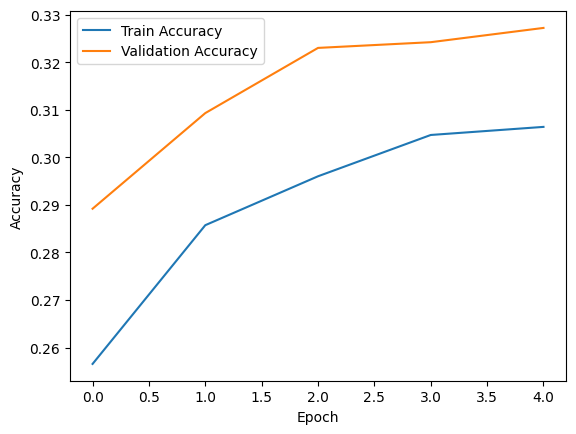

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.3322 - loss: 1.8596
Test Accuracy: 0.3271999955177307


In [ ]:
class_names = ['Airplane','Car','Bird','Cat','Deer',
               'Dog','Frog','Horse','Ship','Truck']

prediction = model.predict(x_test[:1])
predicted_class = class_names[prediction.argmax()]

print("Predicted Class:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Class: Truck
